In [1]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
import contextily

In [4]:
# import osmnx as ox
# G = ox.graph_from_place('Manhattan, New York, USA', network_type='drive')
# fig, ax = ox.plot_graph(G)

Red: https://deepnote.com/@siew-sook-yan/Python-Retrieving-OpenStreetMap-data-with-OSMNX-NIFhR_zARQm2jYqcctP5hg

In [5]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Franklin County, Massachusetts, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
graph = ox.graph_from_place(pioneer_valley, network_type='drive')
area = ox.geocode_to_gdf(pioneer_valley)

In [9]:
print(type(graph))
print(type(area))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [10]:
bldgs = ox.geometries_from_place(pioneer_valley, tags={'building':True}) # Retrieve buildings from the area:

/home/jbo/.local/lib/python3.10/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/home/jbo/.local/lib/python3.10/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [134]:
bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})

In [136]:
bstops.network.unique()

array(['PVTA', 'FRTA', nan, 'Pioneer Valley Transit Authority', 'MART',
       'PVTA 33'], dtype=object)

In [139]:
bridges = pd.read_csv('../data/Bridges.csv')
bridgesgpd = gpd.GeoDataFrame(bridges, geometry=gpd.points_from_xy(x=bridges.Longitude, y=bridges.Latitude))
bridgesgpd = bridgesgpd.set_crs('epsg:4326')
bridgesgpd_clipped = bridgesgpd.clip(area)

In [ ]:
bridge

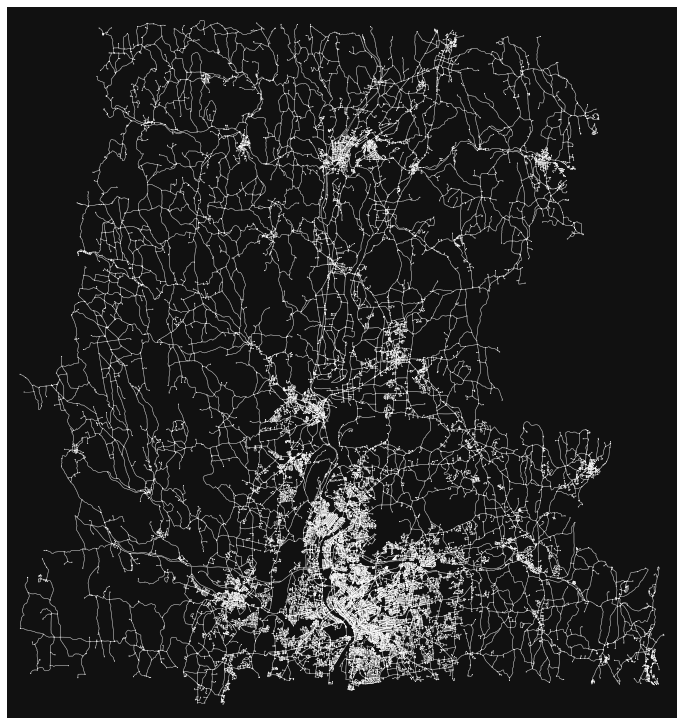

(<Figure size 864x1296 with 1 Axes>, <AxesSubplot:>)

In [12]:
ox.plot_graph(graph, edge_linewidth=.5, node_size=1, figsize=(12, 18),)

In [316]:
ox.basic_stats(graph)

{'n': 27015,
 'm': 70225,
 'k_avg': 5.198963538774755,
 'edge_length_total': 18596507.668999724,
 'edge_length_avg': 264.81320995371624,
 'streets_per_node_avg': 2.7387007218212105,
 'streets_per_node_counts': {0: 0,
  1: 4979,
  2: 138,
  3: 18951,
  4: 2859,
  5: 86,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.18430501573200073,
  2: 0.005108273181565797,
  3: 0.7014991671293725,
  4: 0.10583009439200444,
  5: 0.003183416620396076,
  6: 7.403294466037386e-05},
 'intersection_count': 22036,
 'street_length_total': 9696126.158999939,
 'street_segment_count': 36979,
 'street_length_avg': 262.2062835393044,
 'circuity_avg': 1.0838789220348728,
 'self_loop_proportion': 0.029313934936044783}

## Plots of Streets, Buildings, Bridges, Bus Stops

In [113]:
# Retrieve nodes and edges
intxns, streets = ox.graph_to_gdfs(graph)

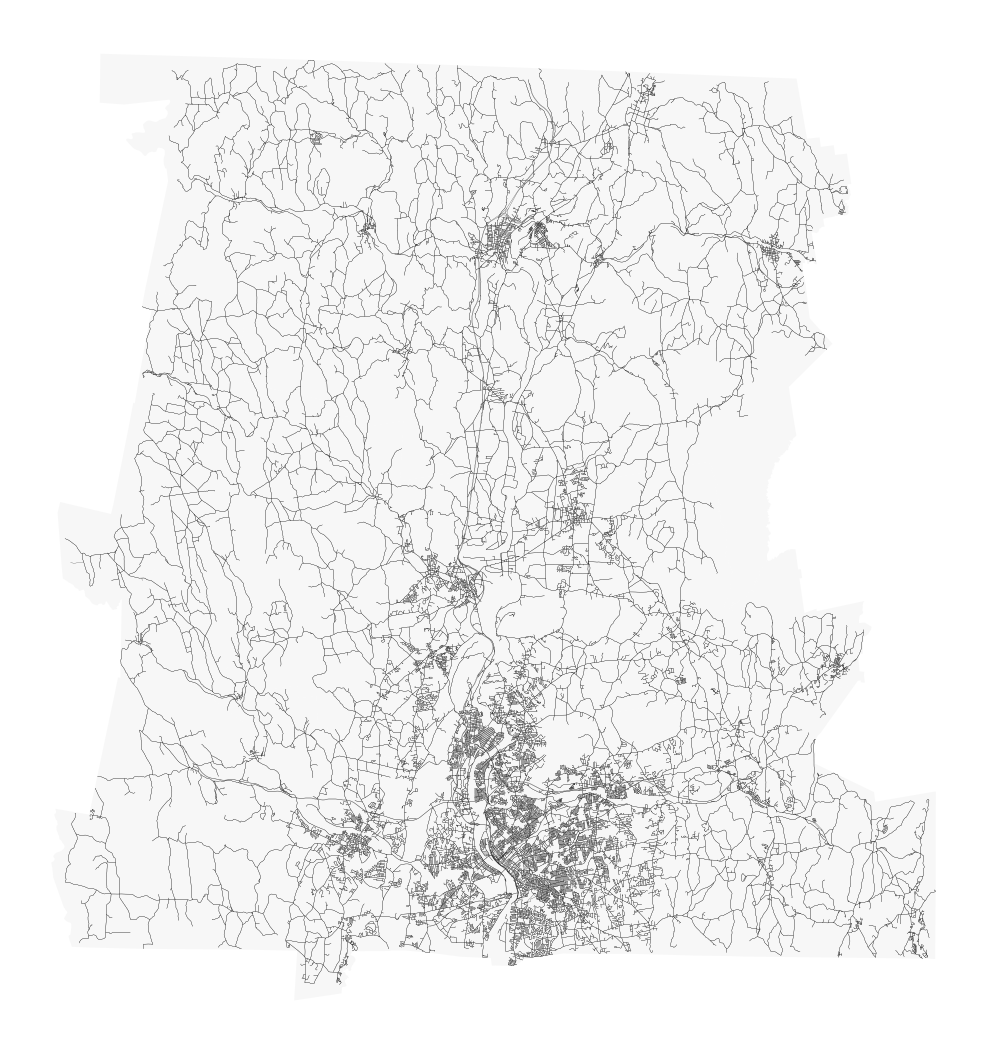

In [171]:
#STREETS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='.9',alpha=.3)
streets.plot(ax=ax, linewidth=.2, edgecolor='k')
plt.tight_layout()
ax.axis('off')
plt.savefig('../figures/pv-streets.png',dpi=120)

In [153]:
bldgs.index.unique(level=0)

Index(['node', 'way', 'relation'], dtype='object', name='element_type')

In [157]:
bldgs.geometry

element_type  osmid    
node          158876125                           POINT (-72.86834 42.24870)
              367777463                           POINT (-72.73565 42.11759)
              367777465                           POINT (-72.79297 42.13141)
              367780874                           POINT (-72.63703 42.16204)
              367780942                           POINT (-72.62647 42.32227)
                                                 ...                        
relation      2875756      POLYGON ((-72.51647 42.34746, -72.51644 42.347...
              7268139      POLYGON ((-72.47251 42.15497, -72.47251 42.154...
              8386237      POLYGON ((-72.58759 42.12104, -72.58795 42.120...
              9282742      POLYGON ((-72.48924 42.08448, -72.48918 42.084...
              12245891     MULTIPOLYGON (((-72.59345 42.34281, -72.59344 ...
Name: geometry, Length: 339201, dtype: geometry

In [315]:
len(bldgs)

339201

In [160]:
bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']

element_type  osmid   
way           24444898    POLYGON ((-72.63001 42.31815, -72.63004 42.318...
              29748975    POLYGON ((-72.79666 42.15798, -72.79660 42.157...
              33821246    POLYGON ((-72.64140 42.17018, -72.64116 42.170...
              33821276    POLYGON ((-72.64107 42.17083, -72.64111 42.170...
              33825017    POLYGON ((-72.64271 42.17181, -72.64267 42.171...
                                                ...                        
relation      2875756     POLYGON ((-72.51647 42.34746, -72.51644 42.347...
              7268139     POLYGON ((-72.47251 42.15497, -72.47251 42.154...
              8386237     POLYGON ((-72.58759 42.12104, -72.58795 42.120...
              9282742     POLYGON ((-72.48924 42.08448, -72.48918 42.084...
              12245891    MULTIPOLYGON (((-72.59345 42.34281, -72.59344 ...
Name: geometry, Length: 339090, dtype: geometry

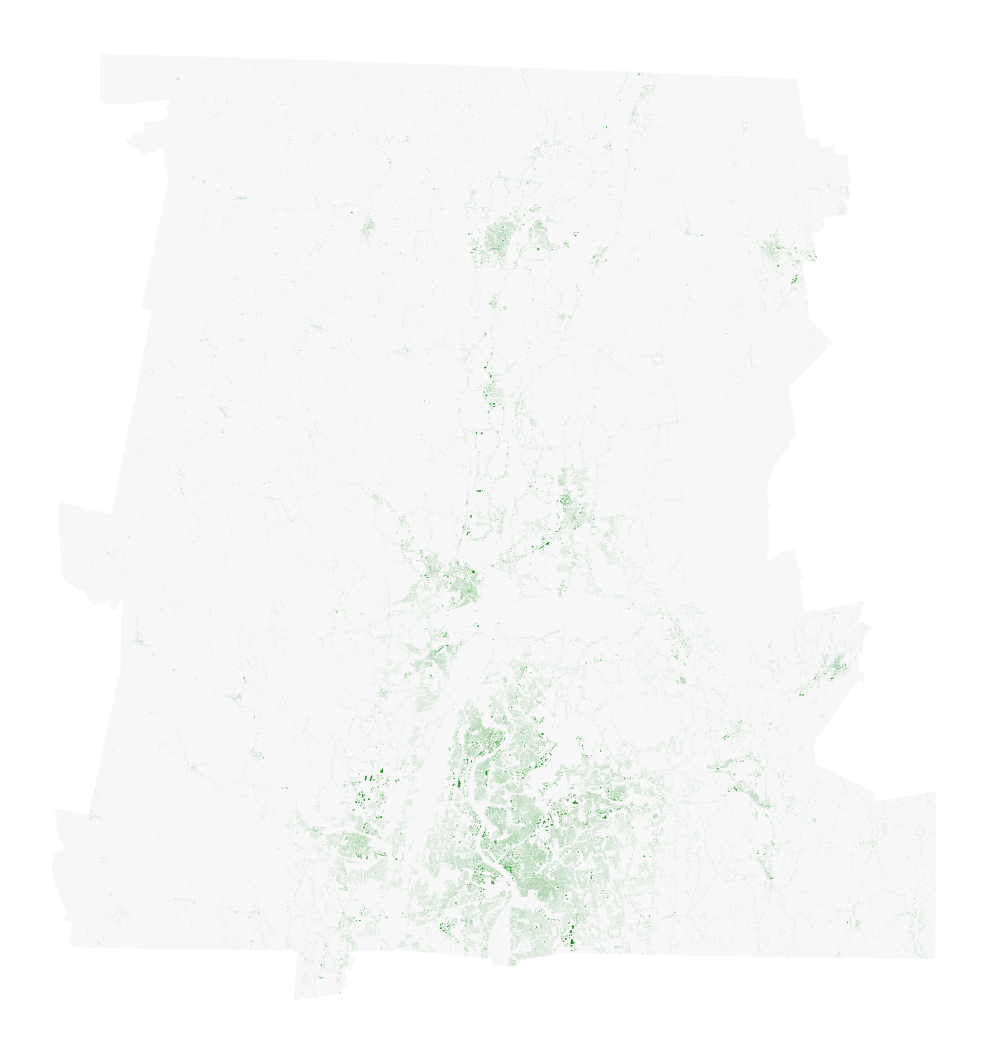

In [288]:
#BLDGS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
blgds_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']
blgds_no_nodes.plot(ax=ax, facecolor='green', alpha=0.9)
plt.tight_layout()
ax.axis('off')
plt.savefig('../figures/pv-buildings.png',dpi=120)

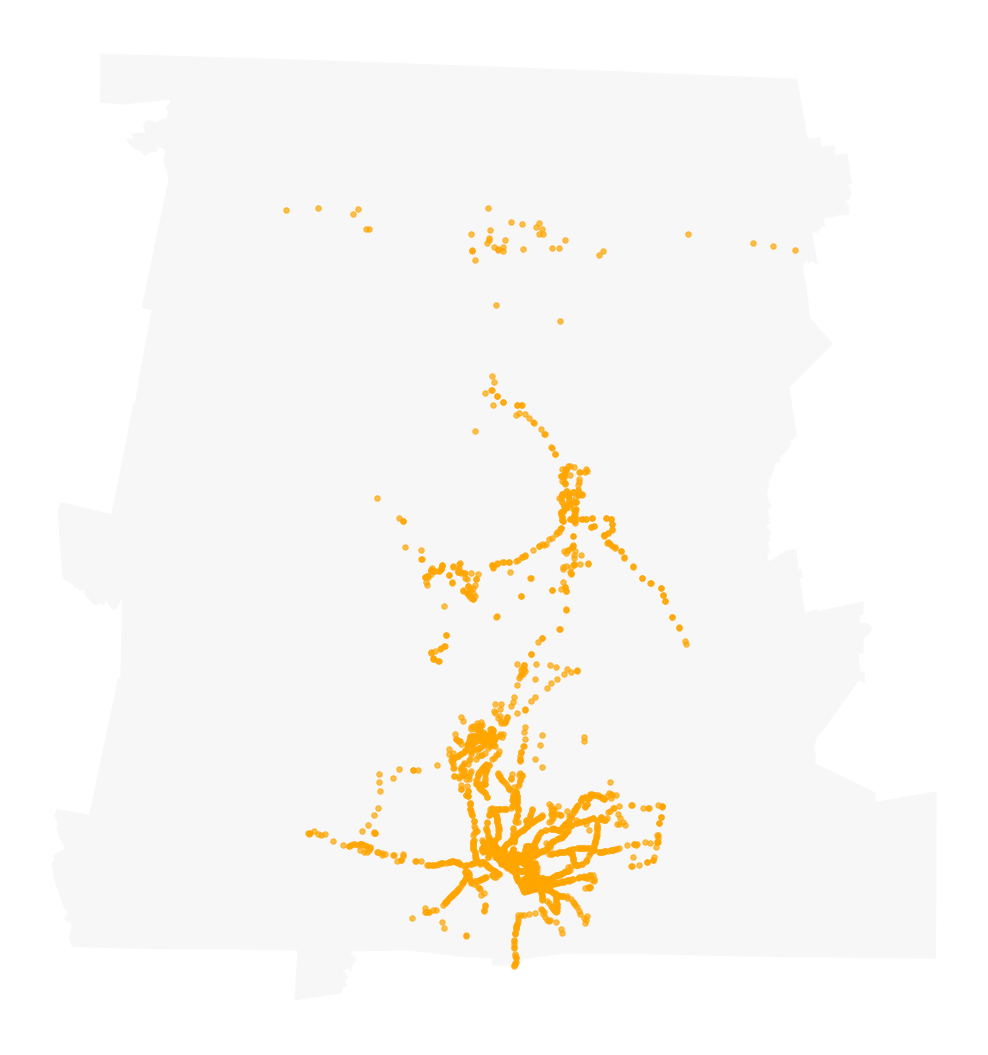

In [303]:
#BUS STOPS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
bstops.plot(ax=ax, color='orange', alpha=.7, markersize=30)
plt.tight_layout()
ax.axis('off')
plt.savefig('../figures/pv-stops.png',dpi=120)

In [317]:
len(bstops)

1993

#STREETS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='.5',alpha=.5)
streets.plot(ax=ax, linewidth=.2, edgecolor='k')
plt.tight_layout()
ax.axis('off')
plt.savefig('../figures/pv-streets.png',dpi=120)

#STREETS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='.5',alpha=.5)
streets.plot(ax=ax, linewidth=.2, edgecolor='k')
plt.tight_layout()
ax.axis('off')
plt.savefig('../figures/pv-streets.png',dpi=120)

In [313]:
len(bridgesgpd_clipped.loc[bridgesgpd_clipped.Structurally_Deficient=='YES'])

136

In [314]:
len(bridgesgpd_clipped.loc[bridgesgpd_clipped.Structurally_Deficient=='NO'])

1455

In [236]:
d = {'NO': 0, 'YES': 1, 'UNKNOWN': 'nan'}
#bridgesgpd_sd = bridgesgpd_clipped
bridgesgpd_sd = bridgesgpd_clipped.loc[bridgesgpd_clipped['Structurally_Deficient'] != 'UNKNOWN']
bridgesgpd_sd['Structurally_Deficient'] = bridgesgpd_sd['Structurally_Deficient'].map(d).fillna(bridgesgpd_sd['Structurally_Deficient']).astype('category')
bridgesgpd_sd.Structurally_Deficient.unique()

/home/jbo/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[0, 1]
Categories (2, int64): [0, 1]

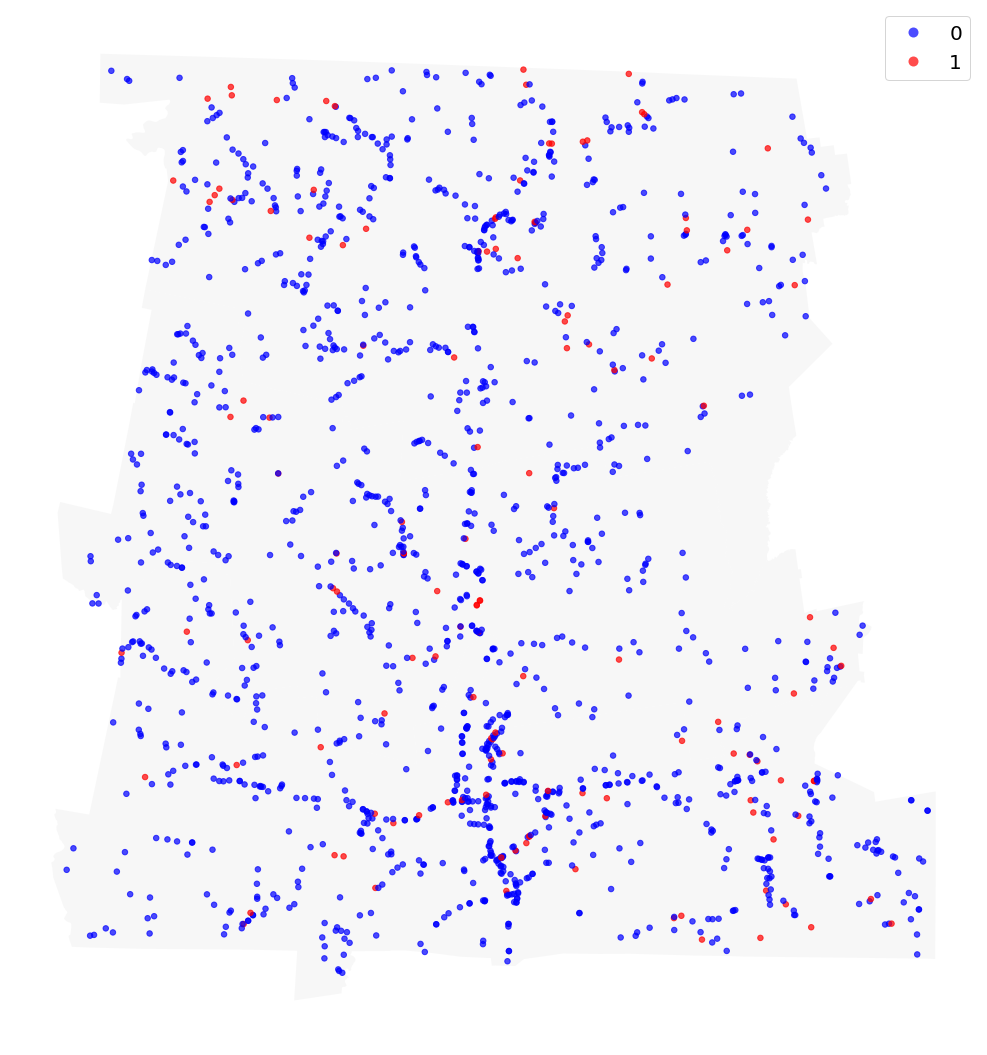

In [302]:
#BRIDGES
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
bridgesgpd_sd.plot('Structurally_Deficient', cmap='bwr', ax=ax,  alpha=.7, markersize=30,legend=True)#, c=bridgesgpd_sd['Structurally_Deficient'], alpha=0.7, markersize=10,legend=True, cmap='Set1')
plt.tight_layout()
ax.axis('off')
plt.savefig('../figures/pv-bridges.png',dpi=120)

Reference for CenPy: https://contextily.readthedocs.io/en/latest/friends_cenpy_osmnx.html

In [31]:
help(cenpy.products.ACS().from_place)

Help on method from_place in module cenpy.products:

from_place(place, variables=None, level='tract', return_geometry=True, place_type=None, strict_within=True, return_bounds=False, replace_missing=True) method of cenpy.products.ACS instance
    Query the Census for the given place. 
    
    Parameters
    ---------
    place               : str
                          description of the place. Should be of the form
                          "place, state" or "place"
    place_type          : str
                          type of place to focus on, Incorporated Place, County Subdivision, or Census Designated Place. 
    variables           : list or str
                          variable or set of variables to extract from the
                          API. Can include regex columns, which will match
                          to any column in the product. So, ['P001001', '^P002']
                          will match to P001001 and any column that starts with P002.
    level         

In [104]:
acs = cenpy.products.ACS()

description  \
table_name                                                      
B00001              UNWEIGHTED SAMPLE COUNT OF THE POPULATION   
B00002                        UNWEIGHTED SAMPLE HOUSING UNITS   
B01001                                             SEX BY AGE   
B01002                                      MEDIAN AGE BY SEX   
B01003                                       TOTAL POPULATION   
...                                                       ...   
C27014             PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE   
C27016      HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...   
C27017      PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO...   
C27018      PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO ...   
C27021      HEALTH INSURANCE COVERAGE STATUS  BY LIVING AR...   

                                                      columns  
table_name                                                     
B00001                                          [B00001_001E]  
B00002                                          [B00002_001E]  
B01001      [B01001_001E, B01001_002E, B01001_003E, B01001...  
B01002                [B01002_001E, B01002_002E, B01002_003E]  
B01003                                          [B01003_001E]  
...                                                       ...  
C27014      [C27014_001E, C27014_002E, C27014_003E, C27014...  
C27016      [C27016_001E, C27016_002E, C27016_003E, C27016...  
C27017      [C27017_001E, C27017_002E, C27017_003E, C27017...  
C27018      [C27018_001E, C27018_002E, C27018_003E, C27018...  
C27021      [C27021_001E, C27021_002E, C27021_003E, C27021...  

[665 rows x 2 columns]

In [262]:
acs.tables.loc[acs.tables.index=='B19025']

description        columns
table_name                                                                  
B19025      AGGREGATE HOUSEHOLD INCOME IN THE PAST 12 MONT...  [B19025_001E]

In [261]:
acs.tables.loc[acs.tables.index=='B01001']

description                                            columns
table_name                                                               
B01001      SEX BY AGE  [B01001_001E, B01001_002E, B01001_003E, B01001...

In [108]:
print(acs.tables.description.unique())

['UNWEIGHTED SAMPLE COUNT OF THE POPULATION'
 'UNWEIGHTED SAMPLE HOUSING UNITS' 'SEX BY AGE' 'MEDIAN AGE BY SEX'
 'TOTAL POPULATION' 'RACE'
 'WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE FOR SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE BY SELECTED GROUPS'
 'AMERICAN INDIAN AND ALASKA NATIVE (AIAN) ALONE OR IN ANY COMBINATION BY SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN A

In [280]:
spfld_msa_demog = cenpy.products.ACS(2017).from_msa('Springfield, MA', variables=['B01001_001E','B19025A_001E','B01002_001E'])
franklin_demog = cenpy.products.ACS(2017).from_county('Franklin County, MA',variables=['B01001_001E','B19025A_001E','B01002_001E'])
# B01001: population (total, and by age (gender))
# B19025: income levels
# B01002_001E median age of total pop

/home/jbo/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/jbo/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/jbo/.local/lib/python3.10/site-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return s

In [281]:
franklin_demog['population_density_psqkm'] = 1000000*franklin_demog['B01001_001E']/franklin_demog.area
spfld_msa_demog['population_density_psqkm'] = 1000000*spfld_msa_demog['B01001_001E']/spfld_msa_demog.area

In [282]:
franklin_demog = franklin_demog.to_crs(streets.crs)
spfld_msa_demog = spfld_msa_demog.to_crs(streets.crs)

In [93]:
franklin_demog

GEOID                                           geometry  \
0   25011041300  POLYGON ((-8083213.020 5249088.100, -8083153.0...   
1   25011040900  POLYGON ((-8090190.640 5244183.430, -8090144.4...   
2   25011041100  POLYGON ((-8083121.630 5252301.220, -8083006.6...   
3   25011040800  POLYGON ((-8093409.550 5222039.570, -8093399.4...   
4   25011040400  POLYGON ((-8071076.970 5248404.730, -8071048.3...   
5   25011040100  POLYGON ((-8128962.100 5266827.170, -8128923.3...   
6   25011040701  POLYGON ((-8079934.770 5249914.260, -8079923.6...   
7   25011040502  POLYGON ((-8054720.130 5243548.160, -8054699.0...   
8   25011041400  POLYGON ((-8084214.890 5248720.560, -8084213.6...   
9   25011041200  POLYGON ((-8083112.390 5252205.180, -8083076.2...   
10  25011041000  POLYGON ((-8087201.150 5248627.120, -8087180.6...   
11  25011041501  POLYGON ((-8112631.760 5244355.710, -8112631.7...   
12  25011041502  POLYGON ((-8109445.120 5245130.820, -8108838.5...   
13  25011040200  POLYGON ((-8090049.930 5271401.140, -8088659.9...   
14  25011040300  POLYGON ((-8072476.810 5270740.080, -8071943.8...   
15  25011040600  POLYGON ((-8074521.080 5229905.970, -8074476.5...   
16  25011040702  POLYGON ((-8078986.660 5248171.910, -8078970.8...   
17  25011040501  POLYGON ((-8055609.010 5252710.200, -8055339.6...   

    B01001A_001E  B01001A_002E  B01001A_003E  B01001A_004E  B01001A_005E  \
0         4154.0        2028.0          74.0          50.0         198.0   
1         4774.0        2151.0          95.0         138.0          92.0   
2         3470.0        1662.0         121.0          54.0          87.0   
3         4249.0        2165.0          87.0         101.0         100.0   
4         3292.0        1578.0          81.0          71.0          61.0   
5         4234.0        2066.0          75.0          70.0         148.0   
6         3625.0        1751.0          76.0         113.0          65.0   
7         3420.0        1544.0          50.0         164.0          42.0   
8         2084.0        1201.0          64.0          43.0          41.0   
9         3145.0        1445.0          41.0          59.0          76.0   
10        3137.0        1599.0          92.0           7.0          54.0   
11        3316.0        1676.0          95.0          73.0          98.0   
12        3681.0        1694.0          77.0          45.0          66.0   
13        4328.0        2171.0          69.0          62.0         184.0   
14        2892.0        1485.0          75.0          20.0         159.0   
15        4532.0        2322.0         136.0         113.0         143.0   
16        3992.0        1819.0          56.0          82.0          92.0   
17        4031.0        1936.0          77.0         121.0         131.0   

    B01001A_006E  B01001A_007E  B01001A_008E  ...  B19025B_001E  B19025C_001E  \
0           57.0          44.0          56.0  ...      986600.0           NaN   
1           76.0           4.0          18.0  ...           NaN           NaN   
2           65.0          12.0          55.0  ...           NaN           NaN   
3           57.0          44.0         380.0  ...     5226700.0           NaN   
4           61.0          11.0          81.0  ...     1363800.0           NaN   
5          114.0          26.0         124.0  ...           NaN           NaN   
6           58.0          73.0          56.0  ...           NaN           NaN   
7           10.0          35.0         145.0  ...           NaN           NaN   
8           67.0          55.0          83.0  ...     1313700.0           NaN   
9           37.0          51.0         103.0  ...           NaN           NaN   
10          66.0          18.0         105.0  ...           NaN           NaN   
11          68.0          41.0         111.0  ...           NaN           NaN   
12          39.0          65.0          74.0  ...           NaN           NaN   
13          89.0          42.0          66.0  ...           NaN           NaN   
14         102.0   

In [101]:
spfld_msa_demog

GEOID                                           geometry  \
0    25013812902  POLYGON ((-72.85299 42.11855, -72.85275 42.119...   
1    25013812901  POLYGON ((-72.78667 42.12033, -72.78651 42.120...   
2    25013812600  POLYGON ((-72.76465 42.10714, -72.76465 42.107...   
3    25015822000  POLYGON ((-72.64647 42.31965, -72.64593 42.320...   
4    25013800600  POLYGON ((-72.61324 42.12714, -72.61161 42.127...   
..           ...                                                ...   
134  25015820700  POLYGON ((-72.50371 42.36301, -72.50367 42.363...   
135  25015820801  POLYGON ((-72.54090 42.31964, -72.53983 42.328...   
136  25013810404  POLYGON ((-72.48182 42.16701, -72.48079 42.167...   
137  25013810414  POLYGON ((-72.52420 42.21875, -72.52317 42.218...   
138  25015820203  POLYGON ((-72.46957 42.33750, -72.46952 42.337...   

     B01001A_001E  B01001A_002E  B01001A_003E  B01001A_004E  B01001A_005E  \
0          4380.0        2230.0         133.0          88.0         109.0   
1          3242.0        1494.0          27.0         106.0          87.0   
2          6126.0        2994.0         109.0          95.0         216.0   
3          1692.0          85.0           3.0           0.0           3.0   
4          1467.0         754.0          75.0         121.0          61.0   
..            ...           ...           ...           ...           ...   
134        3709.0        1630.0          42.0         104.0         141.0   
135        3714.0        1773.0          22.0          35.0         138.0   
136        3557.0        1726.0          10.0          58.0          52.0   
137        6471.0        3459.0         193.0          74.0         344.0   
138        7774.0        3516.0         132.0         245.0         225.0   

     B01001A_006E  B01001A_007E  B01001A_008E  ...  B19025B_001E  \
0            75.0          33.0         141.0  ...           NaN   
1           107.0          27.0          73.0  ...           NaN   
2            88.0          81.0         271.0  ...           NaN   
3             4.0           9.0          15.0  ...           NaN   
4            59.0          19.0          63.0  ...     2747300.0   
..            ...           ...           ...  ...           ...   
134          81.0           0.0         370.0  ...     6330300.0   
135          58.0          18.0         364.0  ...     8946200.0   
136          97.0          47.0         112.0  ...           NaN   
137          69.0         141.0         118.0  ...           NaN   
138         200.0          51.0         118.0  ...           NaN   

     B19025C_001E  B19025D_001E  B19025E_001E  B19025F_001E  B19025G_001E  \
0             NaN           NaN           NaN           NaN     4019800.0   
1             NaN           NaN           NaN           NaN           NaN   
2             NaN           NaN           NaN           NaN           NaN   
3             NaN           NaN           NaN           NaN           NaN   
4             NaN           NaN           NaN     4983700.0      835600.0   
..            ...           ...           ...           ...           ...   
134           NaN    14687300.0           NaN           NaN     6488100.0   
135           NaN    11497200.0           NaN           NaN     5035800.0   
136           NaN           NaN           NaN     3036200.0     2907600.0   
137           NaN           NaN           NaN           NaN     1873700.0   
138           NaN     2598400.0           NaN           NaN           NaN   

     B19025H_001E  B19025I_001E  B19025_001E  \
0     153054200.0     1939000.0  161198300.0   
1      96751200.0           NaN  100194200.0   
2     241385400.0     8289800.0  253693900.0   
3       8192100.0      660300.0   11057500.0   
4             NaN    17483400.0   21164400.0   
..            ...           ...          ...   
134   147909400.0    10130200.0  184178200.0   
135   160670000.0     7655000.0  188639300.0   
136   131839800.0     4067900.0  139657900.0   
137   23846

### Population

In [298]:
matplotlib.rcParams['legend.fontsize'] = 20

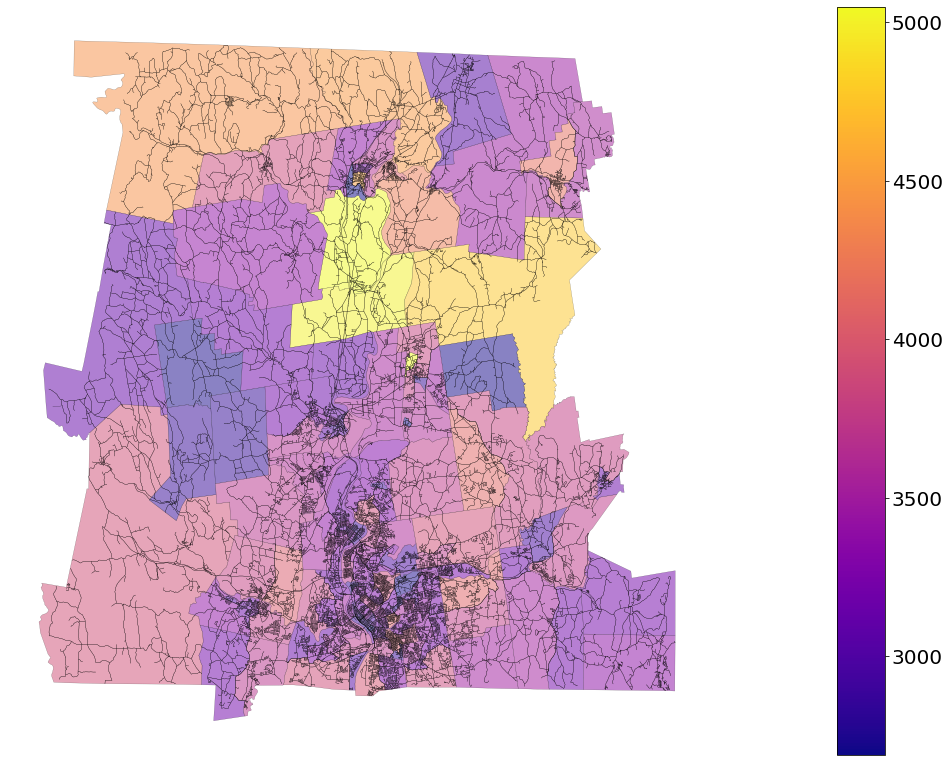

In [296]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#aus_data.eval('pct_afam = B02001_003E / B02001_001E')\.plot('pct_afam', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k', legend=True, cax=cax)
spfld_msa_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
#plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
plt.savefig('../figures/pv-pop.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Population density

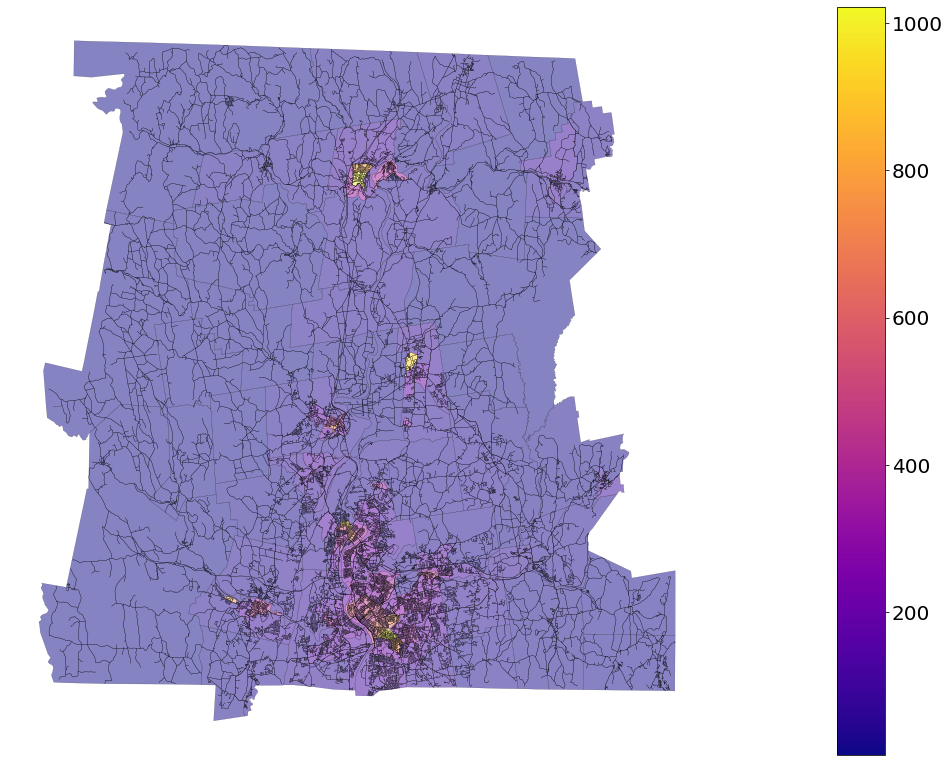

In [304]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
# franklin_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True)
# spfld_msa_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
franklin_demog.plot('population_density_psqkm', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('population_density_psqkm', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-popden.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Income plot

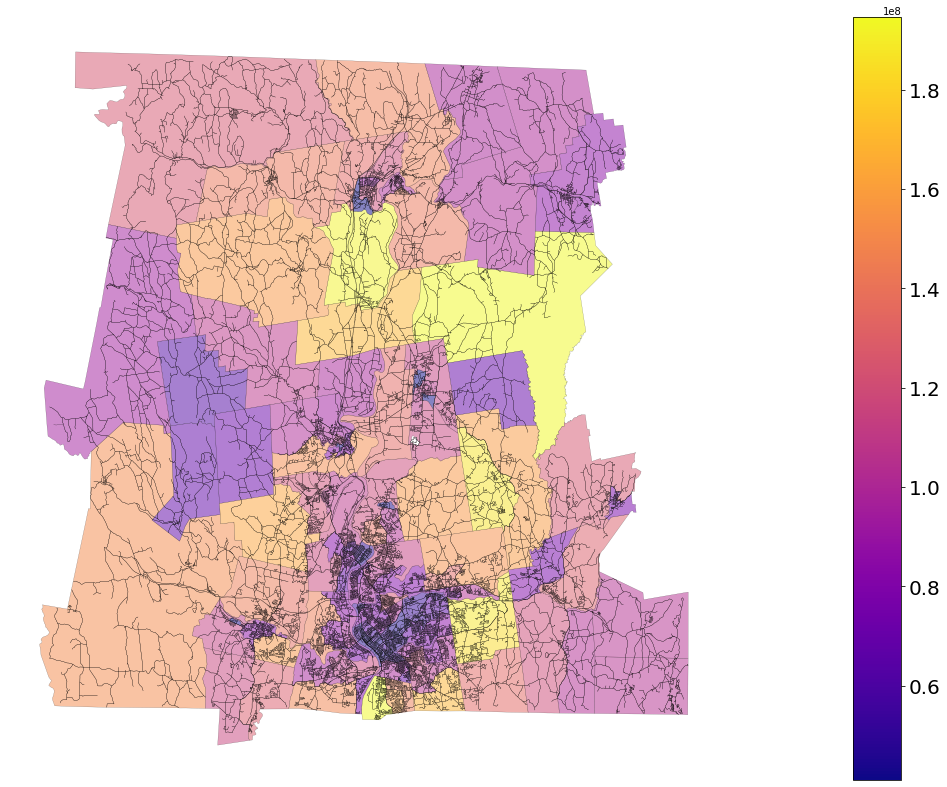

In [310]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B19025A_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B19025A_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
#cax.locator_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-income.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Median age

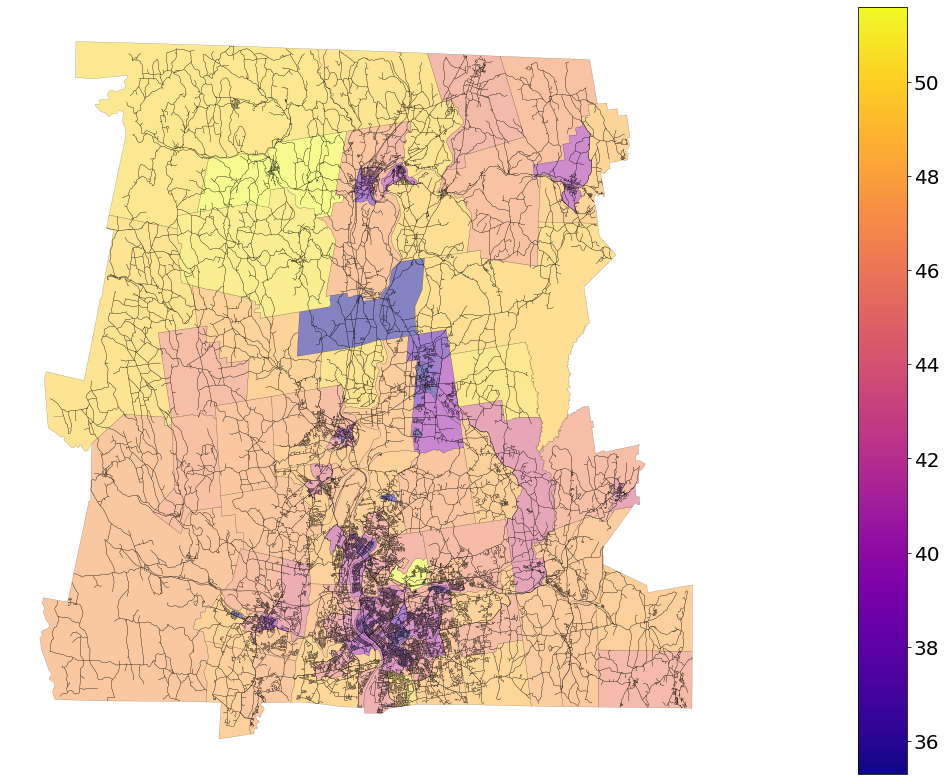

In [308]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B01002_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B01002_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-median-age.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')